# US-Housing-Price-Preiction

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

## Objective
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Data Collection

In [305]:
#Import Various Libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#### Read CSV File

In [306]:
housing=pd.read_csv('train.csv')

In [307]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [308]:
housing.shape

(1460, 81)

## Observation : There are 1460 rows and 81 Columns



### Data Preprocessing


In [309]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing Values 

In [310]:
housing_missing_columns=((housing.isna().sum()*100)/len(housing)).sort_values(ascending=False)

In [311]:
housing_missing_columns_gt_0=[(column,percentage) for column,percentage in housing_missing_columns.items() if percentage>0]

In [312]:
housing_missing_columns_gt_0

[('PoolQC', 99.52054794520548),
 ('MiscFeature', 96.3013698630137),
 ('Alley', 93.76712328767124),
 ('Fence', 80.75342465753425),
 ('FireplaceQu', 47.26027397260274),
 ('LotFrontage', 17.73972602739726),
 ('GarageYrBlt', 5.5479452054794525),
 ('GarageCond', 5.5479452054794525),
 ('GarageType', 5.5479452054794525),
 ('GarageFinish', 5.5479452054794525),
 ('GarageQual', 5.5479452054794525),
 ('BsmtFinType2', 2.6027397260273974),
 ('BsmtExposure', 2.6027397260273974),
 ('BsmtQual', 2.5342465753424657),
 ('BsmtCond', 2.5342465753424657),
 ('BsmtFinType1', 2.5342465753424657),
 ('MasVnrArea', 0.547945205479452),
 ('MasVnrType', 0.547945205479452),
 ('Electrical', 0.0684931506849315)]

## Removing features having missing values >40% 
removing PoolQC,MiscFeature,Fence,FireplaceQu,Alley

In [313]:
housing=housing.drop(['PoolQC','MiscFeature','Fence','FireplaceQu','Alley'],axis=1)

## Imputing the Categorical columns with Null and Numerical with Mean or Median

In [314]:
housing_missing_columns=((housing.isna().sum()*100)/len(housing)).sort_values(ascending=False)

In [315]:
nullcols=[(column,percentage) for column,percentage in housing_missing_columns.items() if percentage>0]

In [316]:
nullcols

[('LotFrontage', 17.73972602739726),
 ('GarageType', 5.5479452054794525),
 ('GarageCond', 5.5479452054794525),
 ('GarageYrBlt', 5.5479452054794525),
 ('GarageFinish', 5.5479452054794525),
 ('GarageQual', 5.5479452054794525),
 ('BsmtFinType2', 2.6027397260273974),
 ('BsmtExposure', 2.6027397260273974),
 ('BsmtFinType1', 2.5342465753424657),
 ('BsmtCond', 2.5342465753424657),
 ('BsmtQual', 2.5342465753424657),
 ('MasVnrArea', 0.547945205479452),
 ('MasVnrType', 0.547945205479452),
 ('Electrical', 0.0684931506849315)]

In [317]:
#replacing Null values with None for below categorical columns
cat_null_columns=['GarageType','GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']

for i in cat_null_columns:
    housing[i]=housing[i].fillna('None')

In [318]:
# replacing Null values with Median for below columns 
housing.GarageYrBlt.fillna(housing.GarageYrBlt.median(),inplace=True)
housing.LotFrontage.fillna(housing.LotFrontage.median(),inplace=True)
housing.MasVnrArea.fillna(housing.MasVnrArea.median(),inplace=True)

In [319]:
#Electrical cant be none so filling it with Mode
housing.Electrical=housing.Electrical.fillna(housing.Electrical.mode()[0])

### Observation: Missing Values were Rectified

In [320]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [321]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Derived Fields

In [322]:
 
#Total Area
housing['Total_sqr_foot']=housing['1stFlrSF']+housing['2ndFlrSF']+housing['BsmtFinSF1']+housing['BsmtFinSF2']

# Bathrooms
housing['Total_bathrooms']=housing['FullBath']+(0.5*housing['HalfBath'])+housing['BsmtFullBath']+(0.5*housing['BsmtHalfBath'])

#Ageof property
housing['prop_Age']=housing['YrSold']-housing['YearBuilt']

#Ageof Garage
housing['garage_age']=housing['YrSold']-housing['GarageYrBlt']

#Remodel Age
housing['remodel_age']=housing['YrSold']-housing['YearRemodAdd']

#Porch Area
housing['Total_porch_SF']=housing['OpenPorchSF']+housing['3SsnPorch']+housing['EnclosedPorch']+housing['ScreenPorch']+housing['WoodDeckSF']




In [323]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_sqr_foot,Total_bathrooms,prop_Age,garage_age,remodel_age,Total_porch_SF
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,2416,3.5,5,5.0,5,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2240,2.5,31,31.0,31,298
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,2272,3.5,7,7.0,6,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1933,2.0,91,8.0,36,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,2853,3.5,8,8.0,8,276


## Fields which have 90% same data and eliminate them as they are of no use

In [324]:
#dropping id column
housing=housing.drop('Id',axis=1)

In [325]:
colswith90_per=[]
for i in housing:
    if housing[i].value_counts().max()>= (len(housing)*90)/100:
        colswith90_per.append(i)
    

In [326]:
colswith90_per

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [327]:
housing=housing.drop(colswith90_per,axis=1)

## Split Data into Categorical and Numerical

In [328]:
Cat_columns=[]
Num_columns=[]
for i in housing:
    if housing[i].dtype=='object':
        Cat_columns.append(i)
    else:
        Num_columns.append(i)
print('Categorical Columns')        
print(Cat_columns)

print('------------------------------xxxxxxxxxxxxxx--------------------------')
print('Numerical Columns')        
print(Num_columns)

Categorical Columns
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']
------------------------------xxxxxxxxxxxxxx--------------------------
Numerical Columns
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_foot', 'Total_bathrooms', 'prop_Age', 'garage_age', 'remodel_age', 'Total_porch_SF']


# Univariate of Categorical Variables

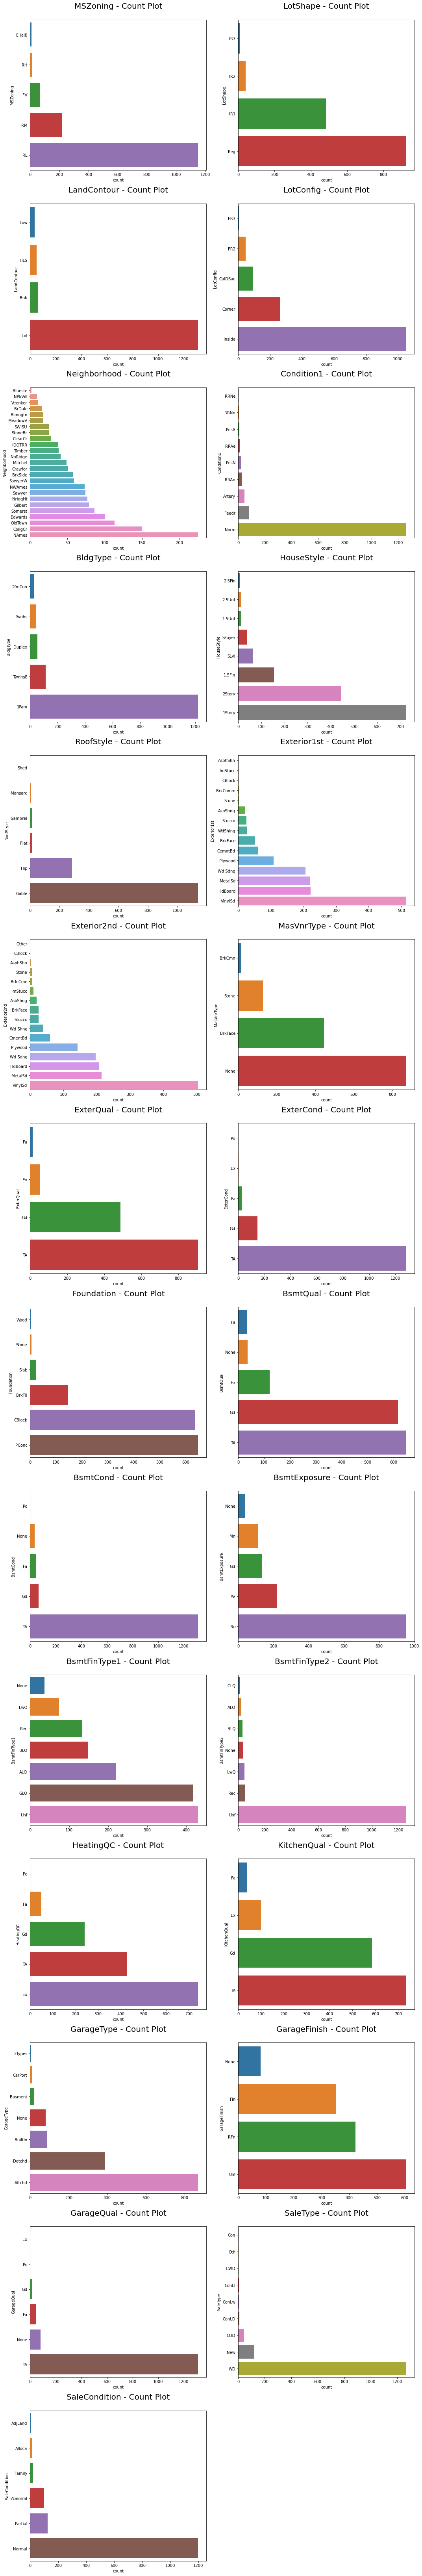

In [329]:
#Lets plot all the categorical columns
plt.figure(figsize=(15,110))#The size of the plot
c=0
for i in Cat_columns:
    c=c+1
    plt.subplot(17,2,c)
    sns.countplot(y=housing[str(i)],order=housing[str(i)].value_counts().sort_values().index)
    plt.title(str(i)+" - Count Plot\n",fontsize=20)#The title of the plot
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

## Description of Numeric Variables

In [330]:
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])
 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,Total_sqr_foot,Total_bathrooms,prop_Age,garage_age,remodel_age,Total_porch_SF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890,1999.808219,2.210616,36.547945,29.226712,22.950000,181.329452
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883,773.992942,0.785399,30.250152,24.034844,20.640653,156.656097
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1493.000000,2.000000,8.000000,7.000000,4.000000,45.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000,1863.500000,2.000000,35.000000,28.000000,14.000000,164.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000,2383.500000,2.500000,54.000000,46.000000,41.000000,266.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,10.000000,2010.000000,278000.000000,3023.100000,3.500000,84.000000,61.000000,56.000000,382.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,11.000000,2010.000000,326100.000000,3334.150000,3.500000,91.000000,78.000000,58.000000,472.150000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.4600

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

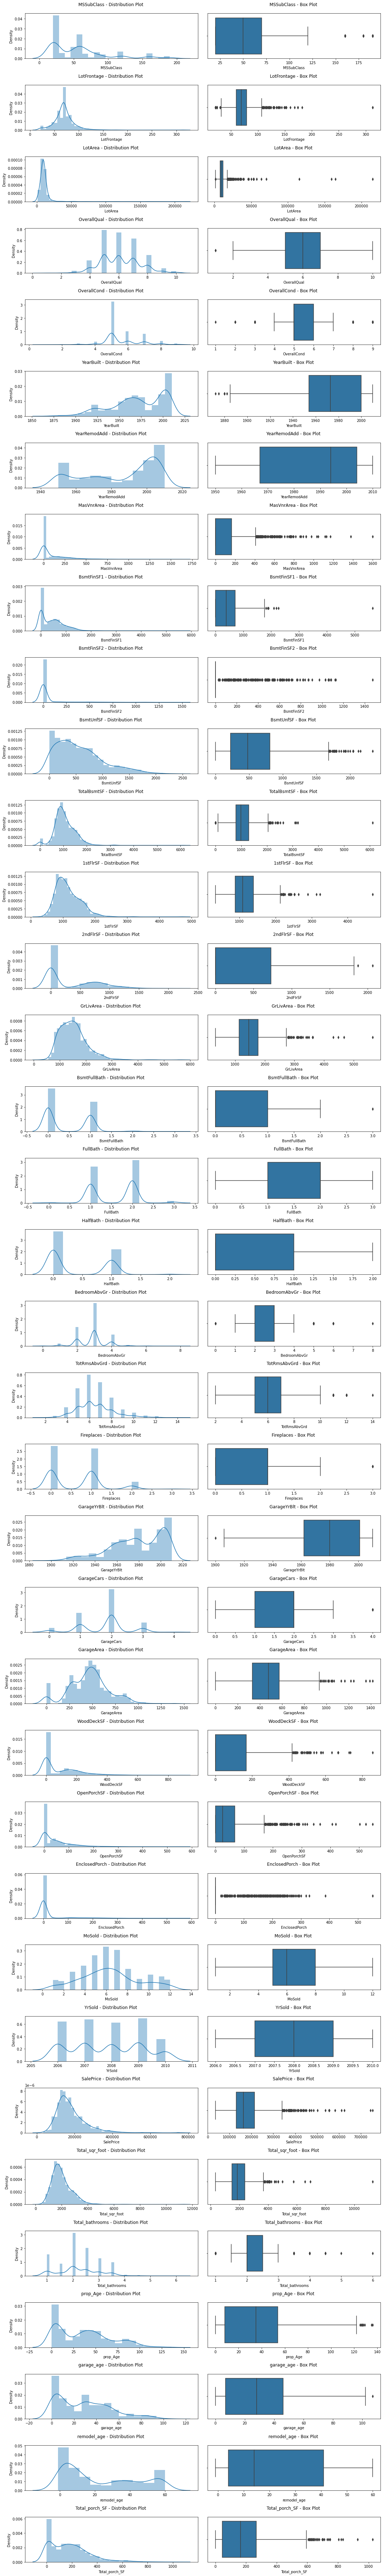

In [331]:
#Lets plot all the numerical columns and observe the outliers
plt.figure(figsize=(15,100))#The size of the plot
c=0
for i in Num_columns:
    c=c+1
    plt.subplot(36,2,c)
    plt.title(str(i)+" - Distribution Plot \n")
    sns.distplot(housing[str(i)])
    c=c+1
    plt.subplot(36,2,c)
    plt.title(str(i)+" - Box Plot \n")
    sns.boxplot(housing[str(i)])
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot


In [332]:
#As we can observe there are outlier in many columns, listing them below
outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_sqr_foot','Total_porch_SF']
for i in outlier:
    qnt = housing[i].quantile(0.98)#removing data above 98 percentile
    housing = housing[housing[i] < qnt]

In [333]:
housing.shape

(1290, 63)

# Bivariate Analysis

#### Categorical Columns

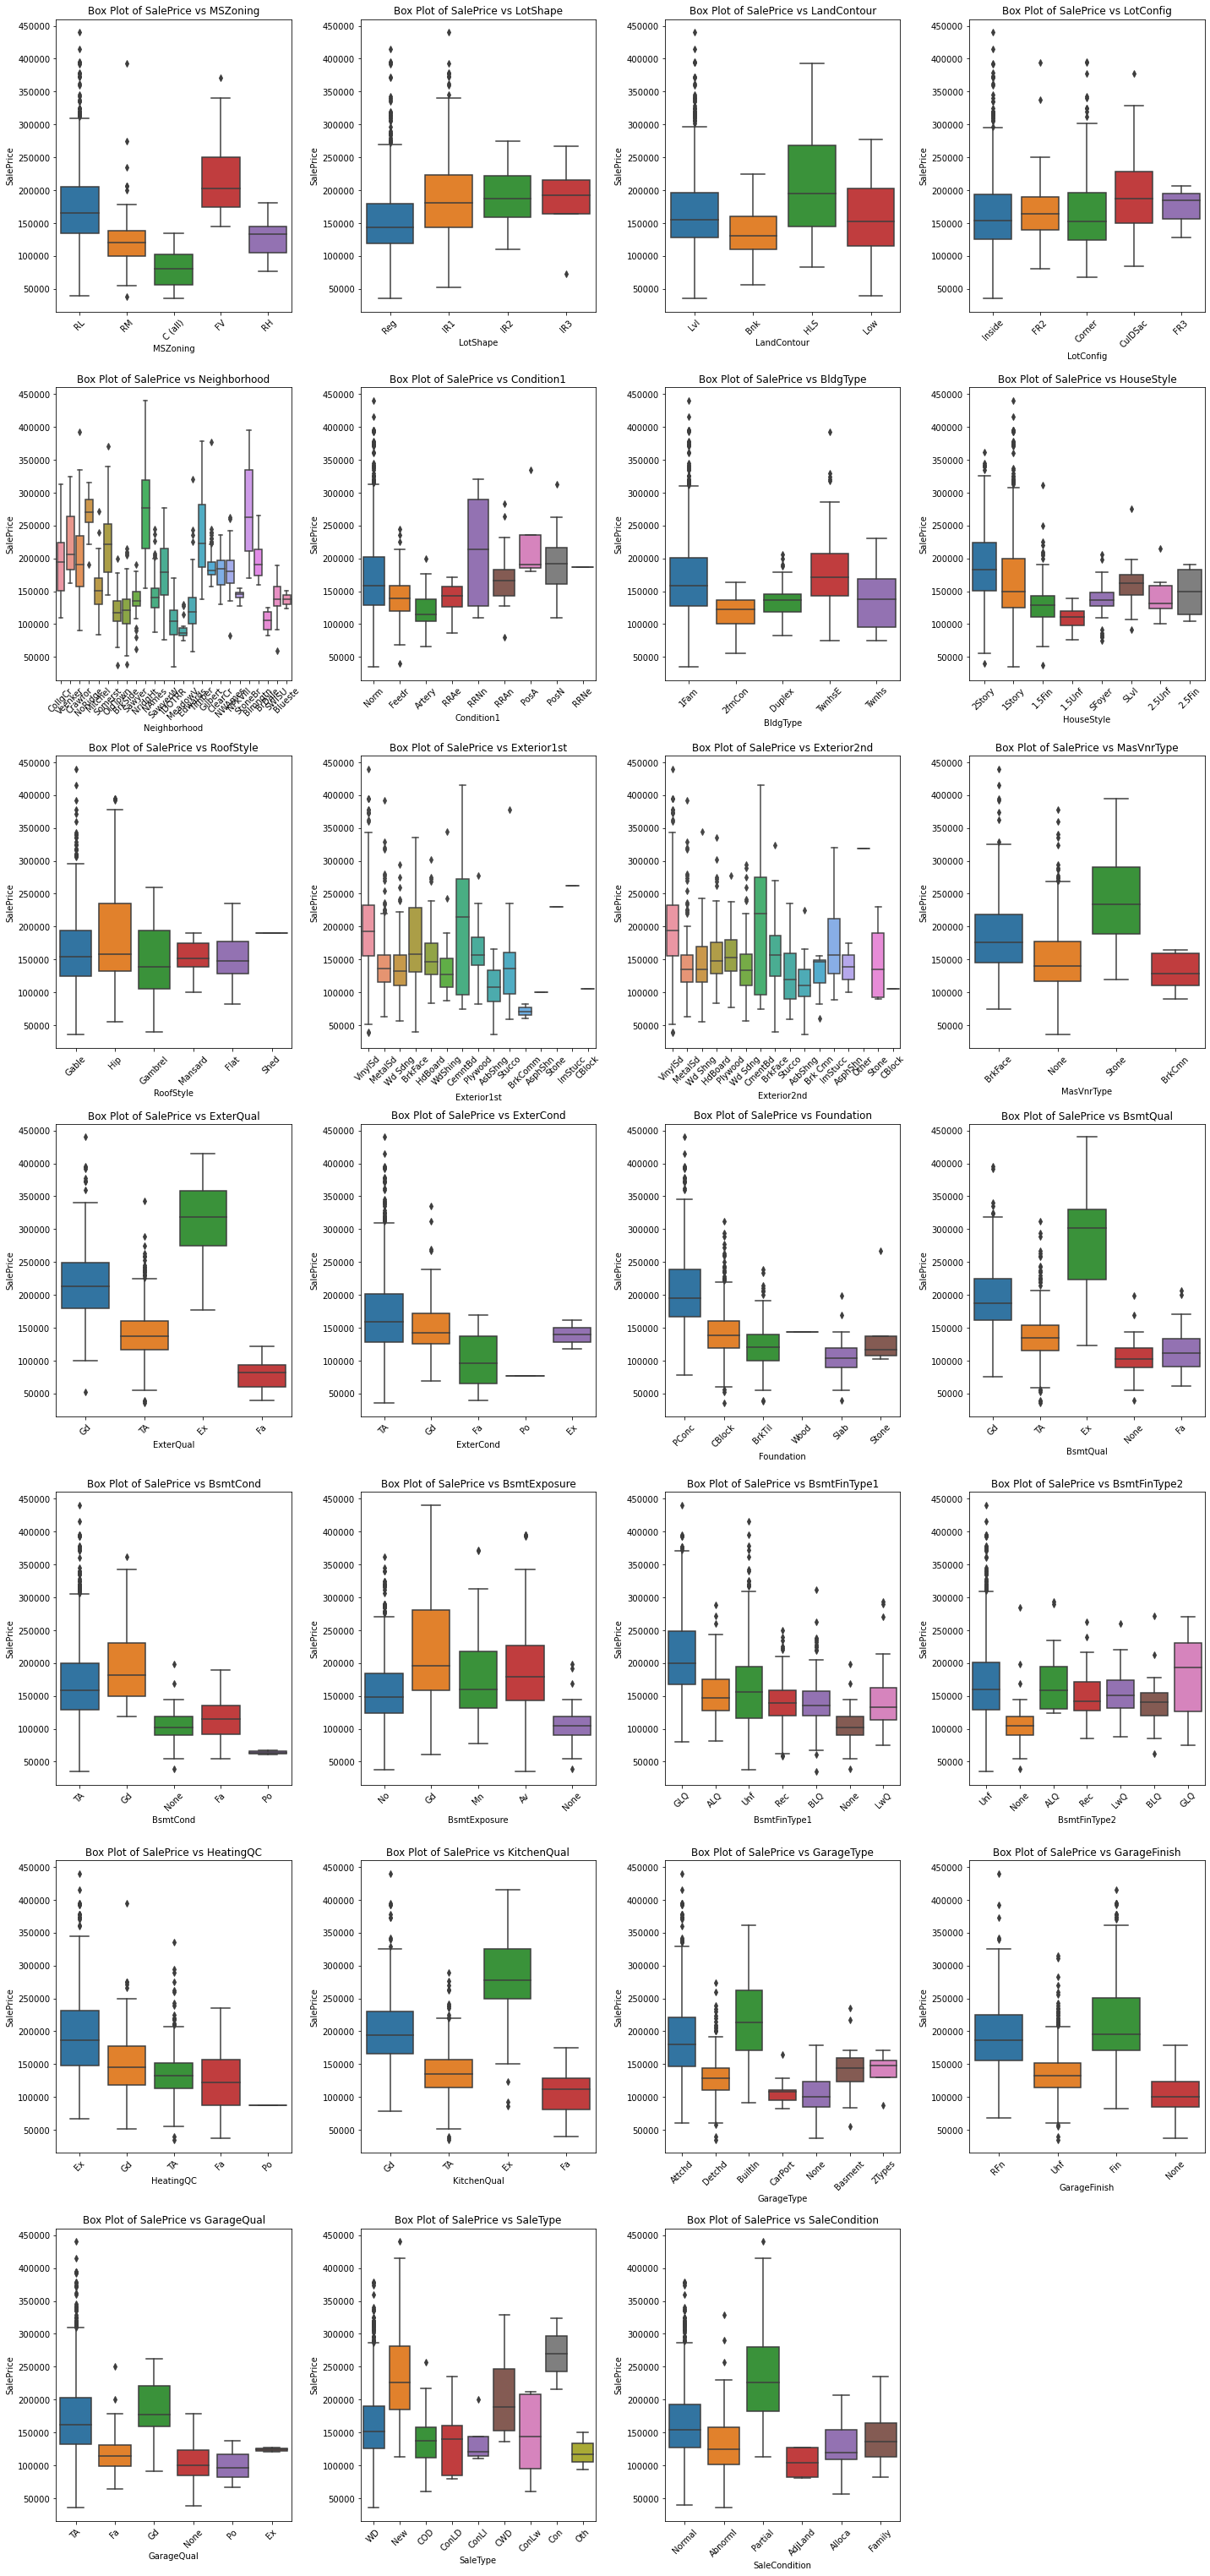

In [334]:
num_rows = (len(Cat_columns) + 1) // 2  
num_cols = 4  
# Create a figure and subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6*num_rows))  # Adjust the figure size as needed
# Loop through the categorical columns and create box plots in subplots
for i, column in enumerate(Cat_columns):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    
    sns.boxplot(x=column, y='SalePrice', data=housing, ax=ax)
    ax.set_title(f'Box Plot of SalePrice vs {column}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed for readability
# Remove any empty subplots
for i in range(len(Cat_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
# Adjust subplot spacing
plt.tight_layout()
# Show the plot
plt.show()


#### Numerical Columns

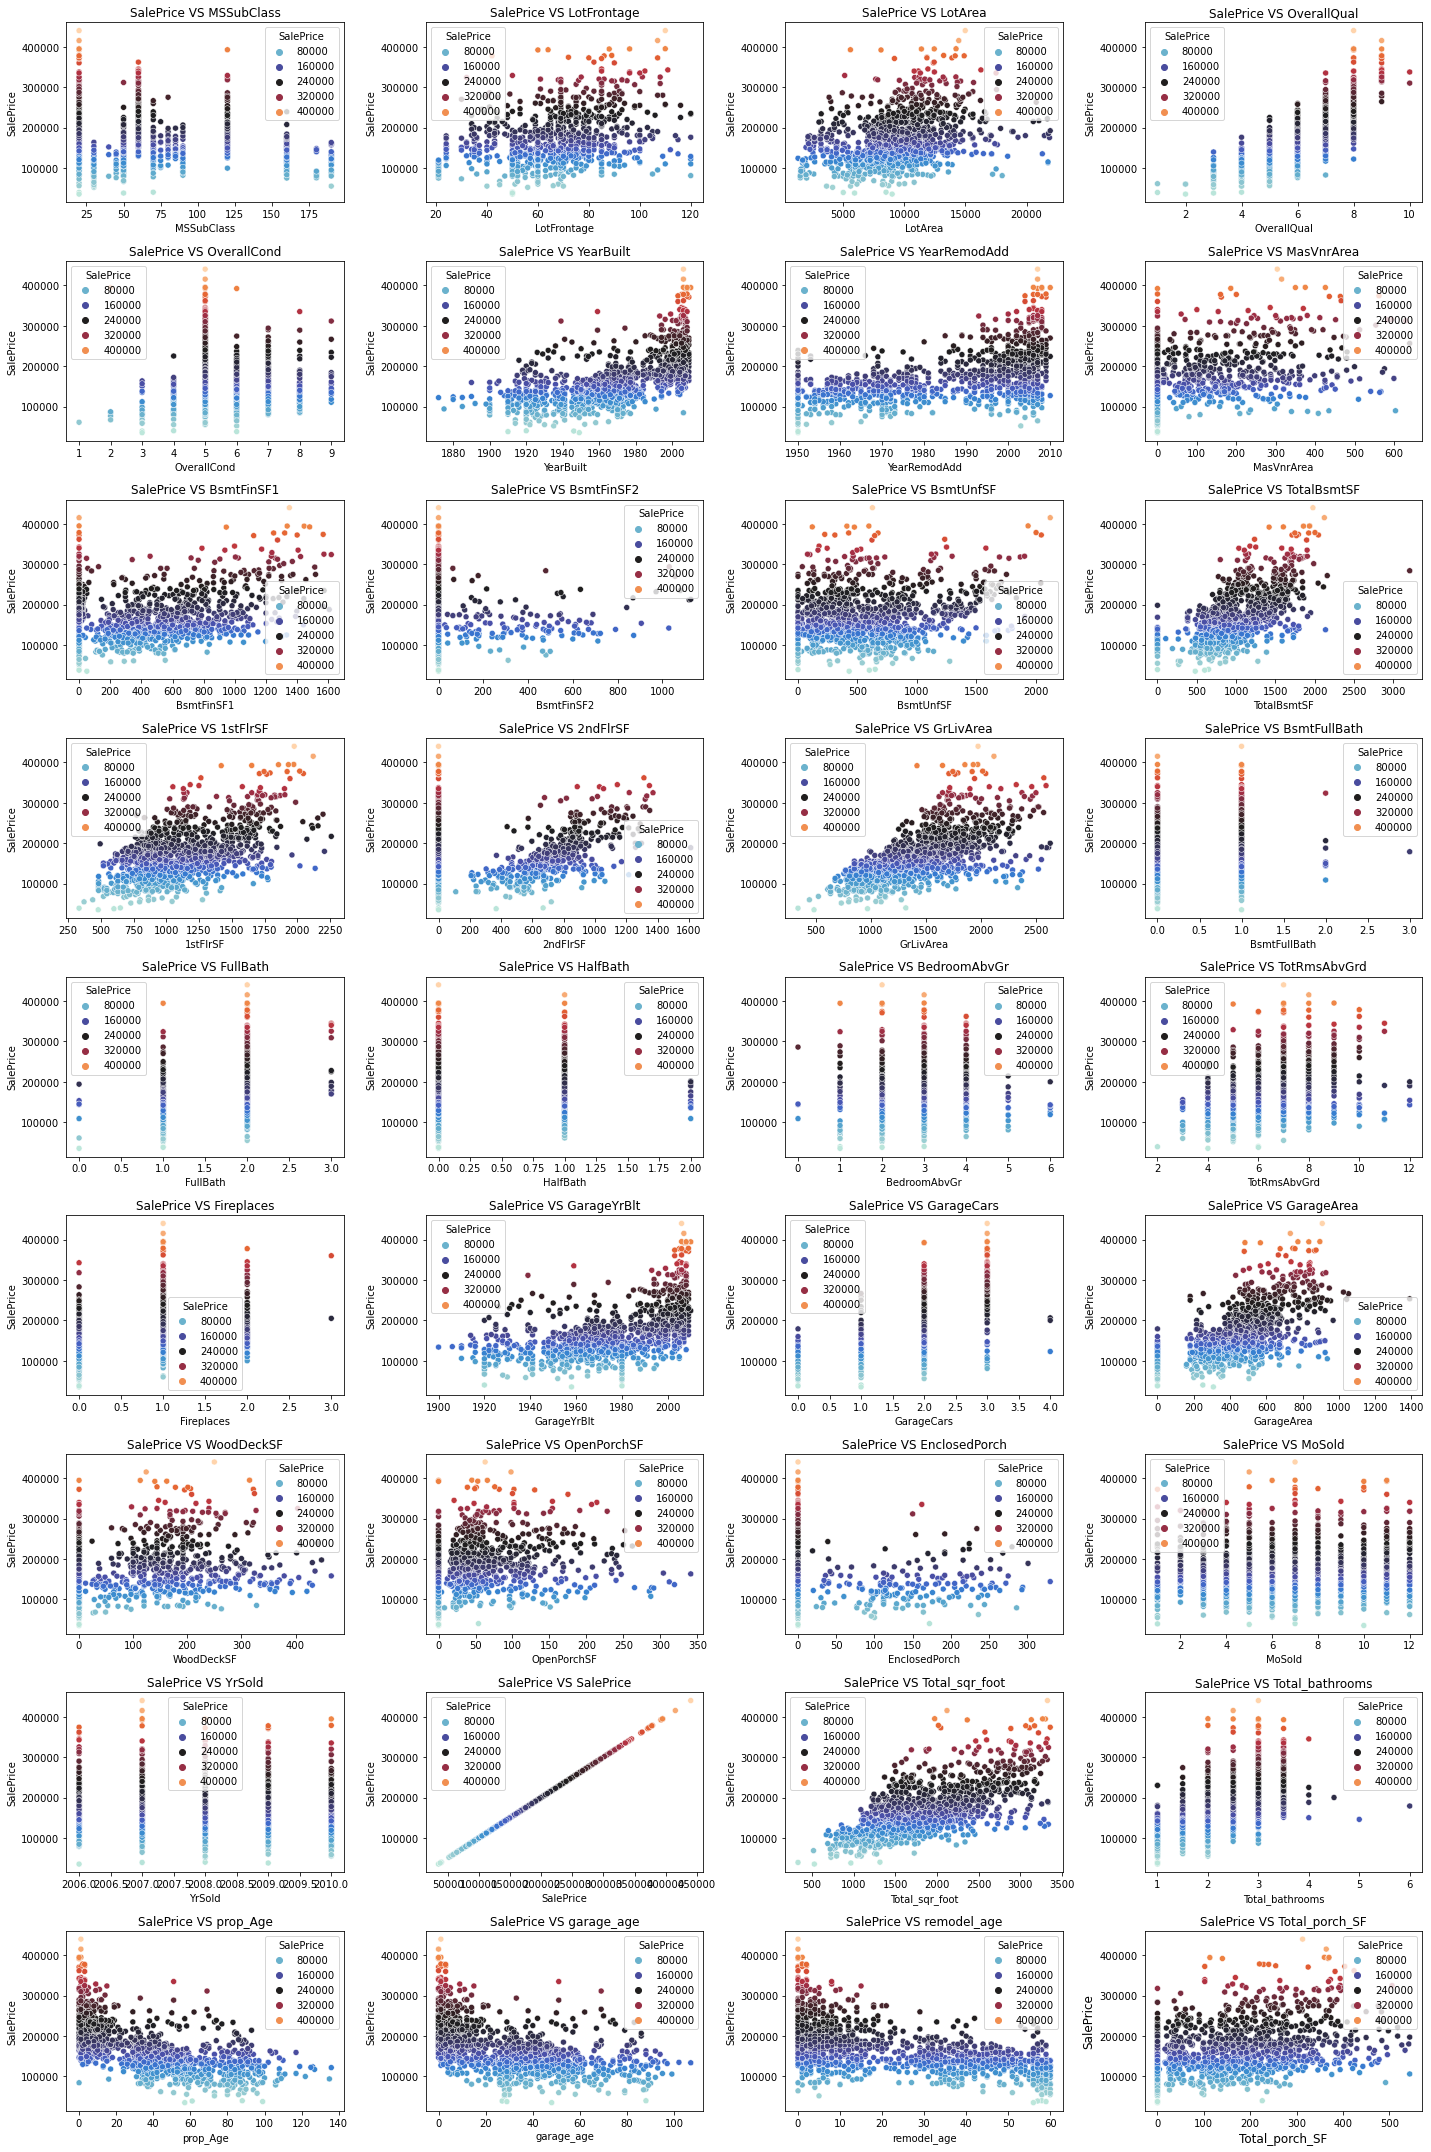

In [335]:
#Visualising numerical predictor variables with Target Variables
df_num = housing[Num_columns]
fig,axs= plt.subplots(9,4,figsize=(20,30))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))
plt.tight_layout()
plt.show()

## Observations
1. Sales Price increase with Total_Sqr_Foot
2. Sales Price increase with GrLiving Aread




# Heat Map of various Numerical Columns

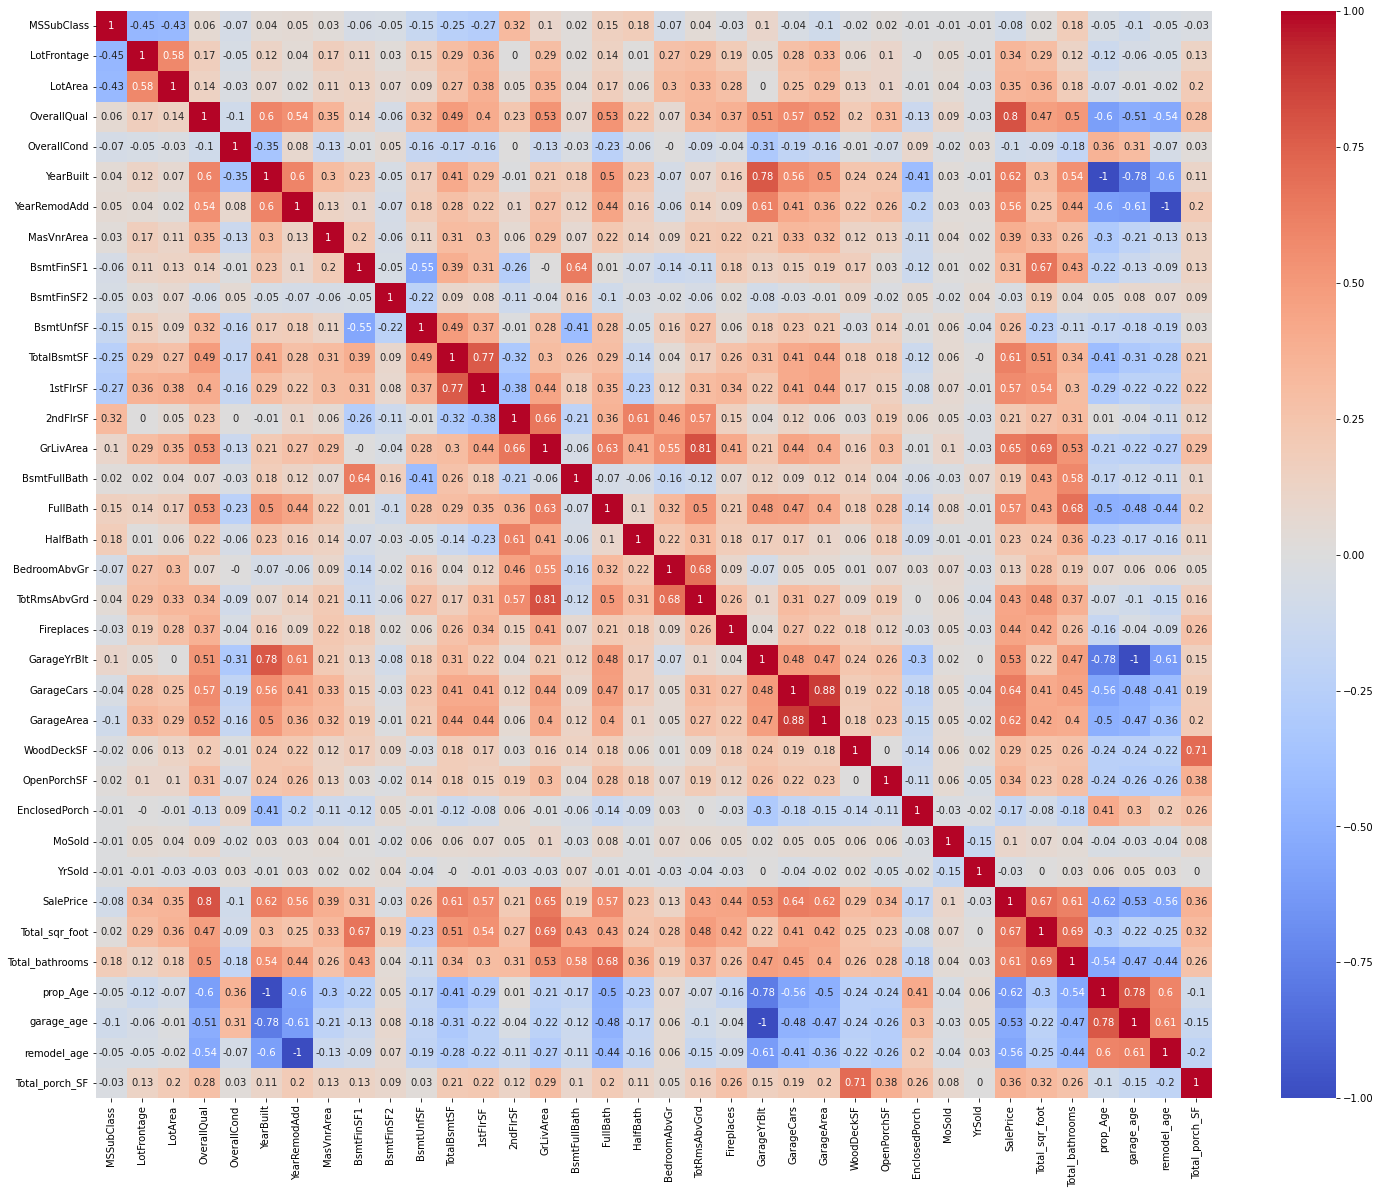

In [336]:

#correlation of Numerical features
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)

plt.show()


## Obsertvations
GarageArea and GarageCars have a strong correlation since both are describing the size.

TotRmsAbvGrd and GrLivArea have a strong correlation

GarageAge and TotalAge also have a strong correlation, could be because many garage had been build in the beginning itself

Extracting collinearity among data with SalesPrice

In [337]:
#Also lets find out which variables has high correlation with SalesPrice
housing.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice          1.00
OverallQual        0.80
Total_sqr_foot     0.67
GrLivArea          0.65
GarageCars         0.64
YearBuilt          0.62
GarageArea         0.62
Total_bathrooms    0.61
TotalBsmtSF        0.61
FullBath           0.57
1stFlrSF           0.57
YearRemodAdd       0.56
GarageYrBlt        0.53
Fireplaces         0.44
TotRmsAbvGrd       0.43
MasVnrArea         0.39
Total_porch_SF     0.36
LotArea            0.35
OpenPorchSF        0.34
LotFrontage        0.34
BsmtFinSF1         0.31
WoodDeckSF         0.29
BsmtUnfSF          0.26
HalfBath           0.23
2ndFlrSF           0.21
BsmtFullBath       0.19
BedroomAbvGr       0.13
MoSold             0.10
YrSold            -0.03
BsmtFinSF2        -0.03
MSSubClass        -0.08
OverallCond       -0.10
EnclosedPorch     -0.17
garage_age        -0.53
remodel_age       -0.56
prop_Age          -0.62
Name: SalePrice, dtype: float64

We can see from this SalesPrice is highly correlated with OverallQual    Total_sqr_foot  GrLivArea   GarageCars                       

In [338]:
housing.shape

(1290, 63)

In [339]:
housing=housing.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','FullBath','HalfBath','BsmtFullBath','OpenPorchSF','EnclosedPorch','WoodDeckSF'],axis=1)

In [340]:
housing.shape


(1290, 53)

## Data Preparation for Modelling

Split into Train and Test Data

Encoding on Catagorical Columns

Scaling on the Continous variables of Train data

In [341]:
cat_col=[]
for i in housing.columns:
    if housing[i].dtype=='object':
        cat_col.append(i)
        housing[i]=housing[i].astype('category')
print('Categorical columns are')
cat_col


Categorical columns are


['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'SaleType',
 'SaleCondition']

We will now create Dummies using GteDummies and Dropfirst

In [342]:
housing=pd.get_dummies(housing,drop_first=True)

In [343]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Total_sqr_foot,Total_bathrooms,prop_Age,garage_age,remodel_age,Total_porch_SF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,150,856,1710,3,8,0,2003.0,2,548,2,2008,208500,2416,3.5,5,5.0,5,61,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,284,1262,1262,3,6,1,1976.0,2,460,5,2007,181500,2240,2.5,31,31.0,31,298,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,434

##  Dividing the Data in terms of TRAIN and TEST

In [344]:
import sklearn
from sklearn.model_selection import train_test_split #for spliting the data in terms of train and test
from sklearn.preprocessing import MinMaxScaler #for performing minmax scaling on the continous variables of training data
from sklearn.feature_selection import RFE #for performing automated Feature Selection
from sklearn.linear_model import LinearRegression #to build linear model
from sklearn.linear_model import Ridge #for ridge regularization
from sklearn.linear_model import Lasso #for lasso regularization
from sklearn.model_selection import GridSearchCV #finding the optimal parameter values
from sklearn.metrics import r2_score #for calculating the r-square value
import statsmodels.api as sm #for add the constant value
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF
from sklearn.metrics import mean_squared_error #for calculating the mean squared error

In [345]:
#Split the data into Test and Train
df_train,df_test = train_test_split(housing, train_size = 0.7, random_state = 100)

# Scaling the data 
we would be using MinMaxscaler so that data is fixed in 1 and 0


In [346]:
housing.dtypes

MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtUnfSF                  int64
TotalBsmtSF                int64
GrLivArea                  int64
BedroomAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars                 int64
GarageArea                 int64
MoSold                     int64
YrSold                     int64
SalePrice                  int64
Total_sqr_foot             int64
Total_bathrooms          float64
prop_Age                   int64
garage_age               float64
remodel_age                int64
Total_porch_SF             int64
MSZoning_FV                uint8
MSZoning_RH                uint8
MSZoning_RL                uint8
MSZoning_RM                uint8
LotShape_I

In [347]:
num_cols=[]
for i in df_train.columns:
    if df_train[i].dtype!='uint8':
        num_cols.append(i)
print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_foot', 'Total_bathrooms', 'prop_Age', 'garage_age', 'remodel_age', 'Total_porch_SF']


In [348]:
# Min Max scalar to all the above columns
Scaler=MinMaxScaler()
df_train[num_cols]=Scaler.fit_transform(df_train[num_cols])

In [349]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=190)

## Observation Data is now good for Model

In [350]:
y_train=df_train.pop('SalePrice')
X_train=df_train 

In [351]:
y_train

715     0.320466
189     0.619461
1089    0.399539
422     0.191972
1451    0.622154
          ...   
911     0.267339
59      0.221377
399     0.508264
89      0.218165
900     0.184559
Name: SalePrice, Length: 902, dtype: float64

#  Training the Model
here i am using RFE for Feature selection


In [352]:
#Fit the Model
lr = LinearRegression()
#Since we have 147 columns in the X_train, lets select only half of it , say 94 using RFE
rfe = RFE(lr, n_features_to_select=95)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 90),
 ('LotFrontage', False, 91),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 51),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 93),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 40),
 ('MoSold', False, 95),
 ('YrSold', True, 1),
 ('Total_sqr_foot', False, 12),
 ('Total_bathrooms', True, 1),
 ('prop_Age', True, 1),
 ('garage_age', True, 1),
 ('remodel_age', True, 1),
 ('Total_porch_SF', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 10),
 ('MSZoning_RL', False, 5),
 ('MSZoning_RM', False, 9),
 ('LotShape_IR2', False, 73),
 ('LotShape_IR3', False, 20),
 ('LotShape_Reg', False, 88),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', False, 61),
 ('LotConfig_CulDSac', False, 

# We would select all the features in Rank 1

In [353]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
X_train_rfe=X_train[Rfe_Cols]
Rfe_Cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'YrSold', 'Total_bathrooms', 'prop_Age',
       'garage_age', 'remodel_age', 'Total_porch_SF', 'MSZoning_FV',
       'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_

In [354]:
#List of columns NOT selected by RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageArea',
       'MoSold', 'Total_sqr_foot', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_PosA', 'Condition1_RRAn', 'Condition1_RRNe',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2n

In [355]:
#add another variable
#add a constant
X_train_sm=sm.add_constant(X_train_rfe)
#create first model
lr=sm.OLS(y_train,X_train_sm)

#fit model
lr_model=lr.fit()

#params
lr_model.params

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:29:05   Log-Likelihood:                 1600.8
No. Observations:                 902   AIC:                            -3034.
Df Residuals:                     818   BIC:                            -2630.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0588      0.016     -3.733      0.000      -0.090      -0.028
LotArea                   0.0757      0.013      5.821      0.000       0.050       0.101
OverallQual               0.1734      0.019      9.004      0.000       0.136       0.211
OverallCond               0.0989      0.012      8.218      0.000       0.075       0.123
YearBuilt                 0.0562      0.012      4.772      0.000       0.033       0.079
YearRemodAdd             -0.0190      0.008     -2.287      0.022      -0.035      -0.003
BsmtUnfSF                -0.0578      0.012     -4.755      0.000      -0.082      -0.034
TotalBsmtSF               0.2307      0.023      9.908      0.000       0.185       0.276
GrLivArea                 0.2382      0.016     14.681      0.000       0.206       0.270
BedroomAbvGr             -0.0234      0.017     -1.360      0.174      -0.057       0.010
Fireplaces                0.0380      0.009      4.131      0.000       0.020       0.056
GarageYrBlt              -0.0204      0.010     -1.951      0.051      -0.041       0.000
GarageCars                0.0541      0.016      3.436      0.001       0.023       0.085
YrSold                    0.0049      0.005      1.044      0.297      -0.004       0.014
Total_bathrooms           0.0302      0.018      1.656      0.098      -0.006       0.066
prop_Age                 -0.1148      0.012     -9.226      0.000      -0.139      -0.090
garage_age               -0.0372      0.010     -3.569      0.000      -0.058      -0.017
remodel_age              -0.0356      0.008     -4.476      0.000      -0.051      -0.020
Total_porch_SF            0.0261      0.007      3.692      0.000       0.012       0.040
MSZoning_FV               0.0241      0.009      2.726      0.007       0.007       0.041
LandContour_HLS           0.0182      0.009      2.074      0.038       0.001       0.035
LandContour_Low          -0.0192      0.013     -1.442      0.150      -0.045       0.007
LotConfig_FR2            -0.0174      0.008     -2.120      0.034      -0.033      -0.001
LotConfig_FR3            -0.0309      0.034     -0.911      0.363      -0.097       0.036
Neighborhood_Blueste   3.907e-16   7.98e-17      4.897      0.000    2.34e-16    5.47e-16
Neighborhood_ClearCr     -0.0360      0.016     -2.207      0.028      -0.068      -0.004
Neighborhood_CollgCr     -0.0216      0.007     -3.317      0.001      -0.034      -0.009
Neighborhood_Crawfor      0.0490      0.009      5.315      0.000       0.031       0.067
Neighborhood_Edwards     -0.0328      0.007     -4.528      0.000      -0.047      -0.019
Neighborhood_Gilbert     -0.0377      0.008     -4.461      0.000      -0.054      -0.021
Neighborhood_Mitchel     -0.0493      0.010     -5.182      0.000      -0.068      -0.031
Neighborhood_NAmes     

### Calculate the VIF

In [356]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending=False)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
84,GarageFinish_None,inf
53,Exterior1st_CBlock,inf
66,BsmtQual_None,inf
68,BsmtCond_None,inf
73,BsmtFinType1_None,inf
16,remodel_age,inf
15,garage_age,inf
14,prop_Age,inf
83,GarageType_None,inf
12,YrSold,inf


In [357]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 1437 to 999
Columns: 190 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(5), int64(21), uint8(164)
memory usage: 144.0 KB


In [358]:
#Lets extract the numerical columns from the df_train
Num_cols = []
for i in df_test.columns :
    if df_test[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 26 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_foot', 'Total_bathrooms', 'prop_Age', 'garage_age', 'remodel_age', 'Total_porch_SF']


In [359]:
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_test[Num_cols] = Scaler.fit_transform(df_test[Num_cols])

In [360]:
#Define X_test and y_test
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test #This contains all the Independent Variables except the Target Variable
#Since 'SalePrice' is the target variable we will keep it only on y-test and remove it from X_train

# Predictions and R2 values

In [361]:
y_pred_train=lr_model.predict(X_train_sm)
y_pred_train.shape
X_test_sm=sm.add_constant(X_test[Rfe_Cols])
y_pred_test=lr_model.predict(X_test_sm)


metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print('r2 train:',r2_train_lr)
metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print('r2 test:',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print('rss train:',rss1_lr)
metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print('rss test:',rss2_lr)
metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print('mse train:',mse_train_lr)
metric.append(mse_train_lr)


mse_test_lr=mean_squared_error(y_test,y_pred_test)
print('mse test:',mse_test_lr)
metric.append(mse_test_lr)





r2 train: 0.9257114906836292
r2 test: 0.8760831922732539
rss train: 1.5179302331208926
rss test: 1.3839641578810977
mse train: 0.001682849482395668
mse test: 0.0035669179326832416


# differnce between the train and test is higher so we will tune using Lambda

## Ridge - Regularization

In [362]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [363]:
print(ridge_model_cv.best_params_)

{'alpha': 2.0}


# Observation Best Value of Lambda is 2

In [364]:
#Fit the Model for alpha=2 and print coiefficients which have been penalized
alpha=2
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-3.16041006e-02  8.85185211e-03  5.91274505e-02  1.25671874e-01
  8.20087463e-02  5.62426081e-02  1.18549078e-02  1.28489719e-02
  2.17286139e-02  6.10896528e-02  1.15339197e-01 -7.26200530e-03
  2.57537768e-02  3.83455259e-02  6.38578410e-03  3.13595033e-02
  2.20994931e-02  1.46601110e-03  2.02383931e-03  1.30494962e-01
  3.60396260e-02 -5.70101805e-02 -6.48916723e-03 -1.17199851e-02
  3.19618834e-02  3.24517054e-02 -2.82495959e-03  2.44257510e-02
  6.77096086e-03 -8.73670300e-04 -7.08641947e-03  2.67857977e-04
  1.55723600e-02 -1.92387009e-02 -4.68307800e-03  1.24337101e-02
 -1.79439832e-02 -1.17384914e-02 -9.75131865e-04  0.00000000e+00
  1.28358840e-02  1.22266292e-02 -2.15378369e-02 -2.02911051e-02
  4.82757375e-02 -3.44300748e-02 -2.89249931e-02 -1.03159749e-04
 -1.60088240e-03 -3.84455845e-02 -2.52021916e-02  1.99383950e-02
 -2.46323082e-02  1.42739816e-02  3.98925400e-02 -1.23314159e-02
 -1.63842052e-02 -1.42552877e-02  3.27303648e-04  1.45098341e-02
  8.92820267e-02 -2.13573

In [365]:
y_pred_train=ridge.predict(X_train)


y_pred_test=ridge.predict(X_test)


rg_metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print('r2 train:',r2_train_lr)
rg_metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print('r2 test:',r2_test_lr)
rg_metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print('rss train:',rss1_lr)
rg_metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print('rss test:',rss2_lr)
rg_metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print('mse train:',mse_train_lr)
rg_metric.append(mse_train_lr)


mse_test_lr=mean_squared_error(y_test,y_pred_test)
print('mse test:',mse_test_lr)
rg_metric.append(mse_test_lr)


r2 train: 0.930057772147798
r2 test: 0.8966515453482901
rss train: 1.4291230663487255
rss test: 1.1542466242817437
mse train: 0.0015843936434021347
mse test: 0.0029748624337158345


# Lasso


In [366]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [367]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


# Observation Best value of Lambda is 0.0001

In [368]:
#Fit the Model for alpha=0.0001 and print coiefficients which have been penalized
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
print(lasso.coef_)

[-4.11653416e-02  2.14541567e-03  5.97725364e-02  1.62788180e-01
  9.44573393e-02  1.13009331e-01  1.93608289e-02  7.94352019e-03
  0.00000000e+00  9.24705842e-02  1.54621519e-01 -0.00000000e+00
  0.00000000e+00  3.28709349e-02  1.10242059e-02  3.98893183e-02
  5.79173298e-03 -0.00000000e+00  0.00000000e+00  1.19117149e-01
  1.95396327e-02 -2.11245514e-02 -6.75746531e-04 -0.00000000e+00
  3.04761310e-02  2.37575833e-02 -1.94540726e-03  1.64288935e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.27597244e-04
  1.39491836e-02 -1.04239555e-02 -0.00000000e+00  1.16050215e-02
 -1.30245298e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.20048897e-02 -1.05205087e-02 -1.58032069e-02
  5.00700589e-02 -2.78418081e-02 -2.26940030e-02  0.00000000e+00
  0.00000000e+00 -3.84265637e-02 -2.20430457e-02  8.68829804e-03
 -2.22890489e-02  7.76447059e-03  4.25213514e-02 -1.16512572e-02
 -8.51024219e-03 -1.11557783e-02  0.00000000e+00  1.60316726e-02
  9.69886070e-02 -1.09254

In [369]:
y_pred_train=lasso.predict(X_train)


y_pred_test=lasso.predict(X_test)


ls_metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print('r2 train:',r2_train_lr)
ls_metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print('r2 test:',r2_test_lr)
ls_metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print('rss train:',rss1_lr)
ls_metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print('rss test:',rss2_lr)
ls_metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print('mse train:',mse_train_lr)
ls_metric.append(mse_train_lr)


mse_test_lr=mean_squared_error(y_test,y_pred_test)
print('mse test:',mse_test_lr)
ls_metric.append(mse_test_lr)

 

r2 train: 0.9273718108623222
r2 test: 0.9025328959064329
rss train: 1.4840050646245668
rss test: 1.0885607942339532
mse train: 0.0016452384308476352
mse test: 0.002805569057304003


In [370]:

lr_metric=pd.DataFrame(['R2SCORE(TRAIN)','R2 SCORE(TEST)','RSS(TRAIN)','RSS(TEST)','MSE(TRAIN)','MSE(TEST)'])
lr_metric.columns=['Metric']

lrm_metric=pd.DataFrame(metric)
lrm_metric.columns=['Linear Regression']
rg_metric=pd.DataFrame(rg_metric)
rg_metric.columns=['Ridge']
ls_metric=pd.DataFrame(ls_metric)
ls_metric.columns=['Lasso']

final_metric=pd.concat([lr_metric,lrm_metric,rg_metric,ls_metric],axis=1)
final_metric


,Metric,Linear Regression,Ridge,Lasso
0,R2SCORE(TRAIN),0.925711,0.930058,0.927372
1,R2 SCORE(TEST),0.876083,0.896652,0.902533
2,RSS(TRAIN),1.517930,1.429123,1.484005
3,RSS(TEST),1.383964,1.154247,1.088561
4,MSE(TRAIN),0.001683,0.001584,0.001645
5,MSE(TEST),0.003567,0.002975,0.002806


In [371]:
betas=pd.DataFrame(index=X_train.columns)
betas.rows=X_train.columns
 
betas['Linear']=lr_model.params
betas['Ridge']=ridge.coef_
betas['Lasso']=lasso.coef_
betas.head(185)


C:\Users\upgrad\AppData\Local\Temp\ipykernel_29632\1674151436.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows=X_train.columns


,Linear,Ridge,Lasso
MSSubClass,NaN,-0.031604,-0.041165
LotFrontage,NaN,0.008852,0.002145
LotArea,7.572336e-02,0.059127,0.059773
OverallQual,1.734416e-01,0.125672,0.162788
OverallCond,9.890430e-02,0.082009,0.094457
YearBuilt,5.615619e-02,0.056243,0.113009
YearRemodAdd,-1.899636e-02,0.011855,0.019361
MasVnrArea,NaN,0.012849,0.007944
BsmtUnfSF,-5.779772e-02,0.021729,0.000000
TotalBsmtSF,2.307131e-01,0.061090,0.092471


## Conclusion
The Best value of Lambda we got in Lasso and Ridge are as below:

Ridge: 2.0
Lasso: 0.0001

and the  r2 values are as below
Ridge Train-0.930  Test-0.897
Lasso Train-0.923  Test-0.903

The Mean Squared error in case of Ridge and Lasso is:

Ridge - 0.002951
Lasso - 0.002785

Mean Sqaured Error of Lasso is less than that of Ridge also Since Lasso helps in feature reduction and helps to increase model interpretation, hence top5 predictor variables based on Lasso regression are

<table>
    <th style="text-align:left;"><b>Factor</b>
        </th>
    <th style="text-align:left;">
        <b> Inference </b>
    </th>
    <tr style="text-align:left;">
        <td>OverallQual</td>
        <td>Increase in Quality increases the price</td>
    </tr>
     <tr style="text-align:left;">
        <td>GrLivArea</td>
        <td>Higher the size of living area higher is the price</td>
    </tr>
     <tr style="text-align:left;">
        <td>Total_sqr_foot</td>
        <td>With increase in Total Square foot of the House Price increases</td>
    </tr>
     <tr style="text-align:left;">
        <td>YearBuilt</td>
        <td>Newer the House the higher is the price, with age the price decreases</td>
    </tr>
     <tr style="text-align:left;">
        <td>Neighborhood_StoneBr</td>
        <td>Stone Brook location also is a factor in increasing the price</td>
    </tr>
            
   </table>

 

# Subjective Question analysis

Question1:What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The Best value of Lambda we got in Lasso and Ridge are as below:

Ridge: 2.0 Lasso: 0.0001

Now if i double the value of alpha for Ridge and Lasso
Starting with 

# Ridge with alpha of 4.0

In [372]:
#Fit the Model for alpha=2 and print coiefficients which have been penalized
alpha=4
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-3.38792015e-02  1.31424928e-02  5.28034892e-02  1.10709013e-01
  7.05382383e-02  4.73128306e-02  1.37723401e-02  1.59711326e-02
  2.20125870e-02  5.76551797e-02  1.03700028e-01 -1.02516721e-03
  3.11006695e-02  4.15670317e-02  6.98951151e-03  3.15190685e-02
  2.59227805e-02  2.06436487e-03  1.87870603e-03  1.21526045e-01
  3.72738376e-02 -4.79533515e-02 -7.11524712e-03 -1.36470930e-02
  3.27712779e-02  2.55941409e-02 -5.52738852e-03  2.15118108e-02
  2.56285278e-03  8.33741658e-04 -5.07128358e-03 -6.92472935e-04
  1.69602500e-02 -1.54765681e-02 -3.96583580e-03  1.40675647e-02
 -1.66551202e-02 -7.34235738e-03 -8.31415573e-04  0.00000000e+00
  9.91794625e-03  1.22087015e-02 -1.70012779e-02 -1.88903210e-02
  4.67927680e-02 -3.22866638e-02 -2.72042117e-02 -2.77893934e-03
 -6.07251450e-03 -3.47250698e-02 -2.33179473e-02  1.54745187e-02
 -1.92574068e-02  1.31229995e-02  3.99251007e-02 -1.23295850e-02
 -1.41323266e-02 -1.37166994e-02  9.14781628e-04  1.73494376e-02
  8.06151820e-02 -1.64987

In [373]:
y_pred_train=ridge.predict(X_train)


y_pred_test=ridge.predict(X_test)


rg_metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print('r2 train:',r2_train_lr)
rg_metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print('r2 test:',r2_test_lr)
rg_metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print('rss train:',rss1_lr)
rg_metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print('rss test:',rss2_lr)
rg_metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print('mse train:',mse_train_lr)
rg_metric.append(mse_train_lr)


mse_test_lr=mean_squared_error(y_test,y_pred_test)
print('mse test:',mse_test_lr)
rg_metric.append(mse_test_lr)

r2 train: 0.9267132621017433
r2 test: 0.8945114196200278
rss train: 1.497461130480052
rss test: 1.1781486062292243
mse train: 0.0016601564639468426
mse test: 0.0030364654799722277


## Lasso with alpha of 0.0002

In [374]:
#Fit the Model for alpha=0.0001 and print coiefficients which have been penalized
alpha=0.0002
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
print(lasso.coef_)

[-0.04805562  0.00478484  0.05473741  0.17281412  0.08884601  0.1030875
  0.02101615  0.00740177  0.04284867  0.02698754  0.10505704 -0.
  0.          0.03291625  0.00350821  0.04444184  0.00761767  0.
  0.          0.1860892   0.01017809 -0.01649349 -0.00558152 -0.
  0.03046605  0.0156084  -0.          0.01502547 -0.          0.
 -0.         -0.          0.01189445 -0.00036807 -0.          0.01192482
 -0.00927649 -0.         -0.          0.          0.          0.01544334
 -0.         -0.0070494   0.05336084 -0.01760362 -0.01100484  0.
  0.         -0.02732166 -0.01235276  0.         -0.01056727  0.
  0.04749168 -0.00600043 -0.         -0.00246256  0.00177604  0.0246943
  0.09382301 -0.          0.          0.          0.0170928   0.
  0.01850785 -0.02579131  0.          0.          0.         -0.
 -0.0173976  -0.01221781 -0.00698898  0.         -0.00444466  0.
 -0.          0.          0.          0.         -0.00029965  0.00478417
  0.          0.         -0.         -0.         -0.

In [375]:
y_pred_train=lasso.predict(X_train)


y_pred_test=lasso.predict(X_test)


ls_metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print('r2 train:',r2_train_lr)
ls_metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print('r2 test:',r2_test_lr)
ls_metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print('rss train:',rss1_lr)
ls_metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print('rss test:',rss2_lr)
ls_metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print('mse train:',mse_train_lr)
ls_metric.append(mse_train_lr)


mse_test_lr=mean_squared_error(y_test,y_pred_test)
print('mse test:',mse_test_lr)
ls_metric.append(mse_test_lr)


r2 train: 0.9227804762453895
r2 test: 0.8856058528197372
rss train: 1.5778193797797748
rss test: 1.2776103780688945
mse train: 0.0017492454321283535
mse test: 0.0032928102527548827


In [376]:

lr_metric=pd.DataFrame(['R2SCORE(TRAIN)','R2 SCORE(TEST)','RSS(TRAIN)','RSS(TEST)','MSE(TRAIN)','MSE(TEST)'])
lr_metric.columns=['Metric']


rg_metric=pd.DataFrame(rg_metric)
rg_metric.columns=['Ridge']
ls_metric=pd.DataFrame(ls_metric)
ls_metric.columns=['Lasso']

final_metric=pd.concat([lr_metric,rg_metric,ls_metric],axis=1)
final_metric

,Metric,Ridge,Lasso
0,R2SCORE(TRAIN),0.926713,0.922780
1,R2 SCORE(TEST),0.894511,0.885606
2,RSS(TRAIN),1.497461,1.577819
3,RSS(TEST),1.178149,1.277610
4,MSE(TRAIN),0.001660,0.001749
5,MSE(TEST),0.003036,0.003293


In [377]:
betas=pd.DataFrame(index=X_train.columns)
betas.rows=X_train.columns
 
betas['Linear']=lr_model.params
betas['Ridge']=ridge.coef_
betas['Lasso']=lasso.coef_
betas.head(185)

C:\Users\upgrad\AppData\Local\Temp\ipykernel_29632\2739107029.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows=X_train.columns


,Linear,Ridge,Lasso
MSSubClass,NaN,-0.033879,-0.048056
LotFrontage,NaN,0.013142,0.004785
LotArea,7.572336e-02,0.052803,0.054737
OverallQual,1.734416e-01,0.110709,0.172814
OverallCond,9.890430e-02,0.070538,0.088846
YearBuilt,5.615619e-02,0.047313,0.103087
YearRemodAdd,-1.899636e-02,0.013772,0.021016
MasVnrArea,NaN,0.015971,0.007402
BsmtUnfSF,-5.779772e-02,0.022013,0.042849
TotalBsmtSF,2.307131e-01,0.057655,0.026988


<table>
    <th style="text-align:left;"><b>Factor</b>
        </th>
    <th style="text-align:left;">
        <b> Inference </b>
    </th>
    <tr style="text-align:left;">
        <td>OverallQual</td>
        <td>Increase in Quality increases the price</td>
    </tr>
     <tr style="text-align:left;">
        <td>GrLivArea</td>
        <td>Higher the size of living area higher is the price</td>
    </tr>
     <tr style="text-align:left;">
        <td>Total_sqr_foot</td>
        <td>With increase in Total Square foot of the House Price increases</td>
    </tr>
     <tr style="text-align:left;">
        <td>YearBuilt</td>
        <td>Newer the House the higher is the price, with age the price decreases</td>
    </tr>
     <tr style="text-align:left;">
        <td>Neighborhood_StoneBr</td>
        <td>Stone Brook location also is a factor in increasing the price</td>
    </tr>
            
   </table>

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

The Best value of Lambda we got in Lasso and Ridge are as below:

Ridge: 2.0
Lasso: 0.0001

and the  r2 values are as below
Ridge Train-0.930  Test-0.897
Lasso Train-0.923  Test-0.903

The Mean Squared error in case of Ridge and Lasso is:

Ridge - 0.002951
Lasso - 0.002785

Mean Sqaured Error of Lasso is less than that of Ridge also Since Lasso helps in feature reduction and helps to increase model interpretation, hence i would choose to apply Lasso

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

# Lasso by removing the most important 5 predictor variables

In [378]:
X_train_phase1=X_train.drop(['OverallQual','GrLivArea','Total_sqr_foot','YearBuilt','Neighborhood_StoneBr'],axis=1)
X_test_phase1=X_test.drop(['OverallQual','GrLivArea','Total_sqr_foot','YearBuilt','Neighborhood_StoneBr'],axis=1)

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_phase1 = Lasso()

# cross validation
folds = 5
lasso_model_cv_phase1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv_phase1.fit(X_train_phase1, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.949e-03, tolerance: 1.679e-03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0002),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [379]:
print(lasso_model_cv_phase1.best_params_)

{'alpha': 0.0001}


In [380]:
#Fit the Model for alpha=0.0001 and print coiefficients which have been penalized
alpha=0.0001
lasso_phase1=Lasso(alpha=alpha)
lasso_phase1.fit(X_train_phase1,y_train)
print(lasso_phase1.coef_)

[-4.29724010e-02  1.28070555e-02  6.78495148e-02  9.41639001e-02
  2.35275917e-02  2.53640197e-02 -3.67806482e-02  3.23406091e-01
  0.00000000e+00  1.26092809e-01  6.23471130e-02  7.47481321e-03
  3.80543650e-02  3.94800259e-02  7.39843804e-03  3.37839962e-04
  8.65791096e-02 -1.33119336e-01 -0.00000000e+00 -0.00000000e+00
  4.06599500e-02  3.54090718e-02 -0.00000000e+00  2.69493940e-02
  4.80021135e-03  0.00000000e+00 -0.00000000e+00 -3.02658343e-04
  2.10962698e-02 -1.26922205e-02 -7.57159309e-03  1.43818158e-02
 -1.82782422e-02 -0.00000000e+00 -2.28356084e-03  0.00000000e+00
 -0.00000000e+00  7.74300658e-03 -2.61069591e-02 -3.43975623e-02
  4.41976423e-02 -4.49417967e-02 -4.93301685e-02 -6.81305520e-03
 -1.63359943e-02 -5.49058321e-02 -3.51950226e-02  0.00000000e+00
 -2.60325178e-02  5.19004261e-03  1.48386002e-02 -7.04810878e-03
 -1.04763966e-02 -2.57723377e-02 -1.13069994e-02  0.00000000e+00
 -3.87042594e-02 -0.00000000e+00  0.00000000e+00  1.83194029e-02
  0.00000000e+00  2.99238

In [381]:
y_pred_train=lasso_phase1.predict(X_train_phase1)


y_pred_test=lasso_phase1.predict(X_test_phase1)


ls_metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print('r2 train:',r2_train_lr)
ls_metric.append(r2_train_lr)
r2_test_lr=r2_score(y_test,y_pred_test)
print('r2 test:',r2_test_lr)
ls_metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print('rss train:',rss1_lr)
ls_metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print('rss test:',rss2_lr)
ls_metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print('mse train:',mse_train_lr)
ls_metric.append(mse_train_lr)


mse_test_lr=mean_squared_error(y_test,y_pred_test)
print('mse test:',mse_test_lr)
ls_metric.append(mse_test_lr)

r2 train: 0.9054168838794716
r2 test: 0.8032095473970239
rss train: 1.932608055045409
rss test: 2.197853043602364
mse train: 0.0021425809922898105
mse test: 0.005664569700006093


In [382]:
betas=pd.DataFrame(index=X_train_phase1.columns)
betas.rows=X_train_phase1.columns
 

betas['Lasso']=lasso_phase1.coef_
betas.head(185)

C:\Users\upgrad\AppData\Local\Temp\ipykernel_29632\592979313.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows=X_train_phase1.columns


,Lasso
MSSubClass,-0.042972
LotFrontage,0.012807
LotArea,0.067850
OverallCond,0.094164
YearRemodAdd,0.023528
MasVnrArea,0.025364
BsmtUnfSF,-0.036781
TotalBsmtSF,0.323406
BedroomAbvGr,0.000000
TotRmsAbvGrd,0.126093


<table>
    <th style="text-align:left;"><b>Factor</b>
        </th>
    <th style="text-align:left;">
        <b> Inference </b>
    </th>
    <tr style="text-align:left;">
        <td>TotalBsmtSF</td>
        <td>Higher the size of Basement area higher is the price </td>
    </tr>
     <tr style="text-align:left;">
        <td>TotRmsAbvGrd</td>
        <td>Higher the number of rooms higher is the cost</td>
    </tr>
     <tr style="text-align:left;">
        <td>OverallCond</td>
        <td>As the condition increases the Price also increases</td>
    </tr>
     <tr style="text-align:left;">
        <td>Total_bathrooms</td>
        <td>Higher the number of Bathrooms higher is the price</td>
    </tr>
     <tr style="text-align:left;">
        <td>LotArea</td>
        <td>Price also increases with increase in Lot area</td>
    </tr>
            
   </table>